In [3]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
# いかさまサイコロのとりうる値の集合
x_set = np.array([1, 2, 3, 4, 5, 6])

In [5]:
# いかさまサイコロの確率変数
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [6]:
# 確率変数Xが求まる
X = [x_set, f]

In [7]:
# 確率変数から各xkの確率pkを求める

# 確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set]) 
# x_kとp_kの対応を辞書型にして表示
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

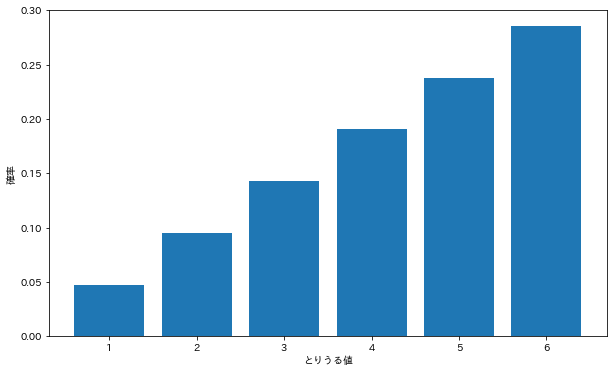

In [8]:
# とりうる値と確率の対応を棒グラフにして表示する
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('とりうる値')
ax.set_ylabel('確率')

plt.show()

In [9]:
# 確率がすべて0以上であるかチェック
np.all(prob>=0)

True

In [10]:
# 確率の総和が1であるかチェック
np.sum(prob)

0.9999999999999999

In [11]:
# 確率変数Xがx以下になるときの確率を返す関数を、
# 累積分布関数と呼ぶ
# np.sum()を使うと将来違う結果になるWarningが出てきたので、sum()
def F(x):
    return sum(f(x_k) for x_k in x_set if x_k<=x)

In [12]:
# 出目が3以下になる確率
F(3)

0.2857142857142857

In [13]:
# 2X + 3を確率変数Yとする
y_set = np.array([2*x_k+3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set]) 
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [14]:
# 離散型確率変数の場合、確率変数の平均は
# 確率変数のとりうる値とその確率の積の総和で求める事ができる
# →期待値
# また、期待値は無限回試行したときの実現値の平均である
 sum(x_k*f(x_k) for x_k in x_set)

4.333333333333333

In [15]:
# 上で求めた期待値が無限回試行したときの
# 実現値の平均に近いのか試してみる
# 100万回試行してみる(無限回試行の計算はできないので)
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.331767

In [16]:
# 離散型確率変数の期待値を求める式
def E(X, g=lambda x: x):
    x_set, f=X
    return sum(g(x_k)*f(x_k) for x_k in x_set)

In [17]:
# そのまま確率変数Xの期待値を求める
E(X)

4.333333333333333

In [18]:
# Y = 2X + 3の期待値を求める
E(X, g=lambda x: 2*x+3)

11.666666666666664

In [19]:
# 確率変数は線形性を持つ
# E(aX + b) = a*E(x) + b
2 * E(X) + 3

11.666666666666666

In [20]:
# いかさまサイコロの分散を求める
# 離散型確率変数の分散は、
# 各値から期待値を引いた物と確率の積の和
 sum(((x_k- E(X))**2)*f(x_k) for x_k in x_set)

2.2222222222222223

In [21]:
# 離散型確率変数の分散を求める一般式
def V(X, g=lambda x: x):
    x_set, f=X
    return sum(((x_k- E(X, g))**2)*f(x_k) for x_k in x_set)

In [22]:
# そのまま確率変数Xの分散を求める
V(X)

2.2222222222222223

In [23]:
# Y = 2X + 3の分散を求める
V(X, g=lambda x: 2*x+3)

55.99999999999997

In [24]:
# 分散の公式
# V(aX+b) = a^2V(X)
2**2*V(X)

8.88888888888889

In [26]:
# サイコロAの出目をY
# サイコロA、Bの出目の合計をXとする
# X、Yの2次元の離散型確率を考える
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [27]:
# 確率変数を定義する
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [29]:
# 確率変数(X, Y)の振る舞いをリストにする
XY = [x_set, y_set, f_XY]

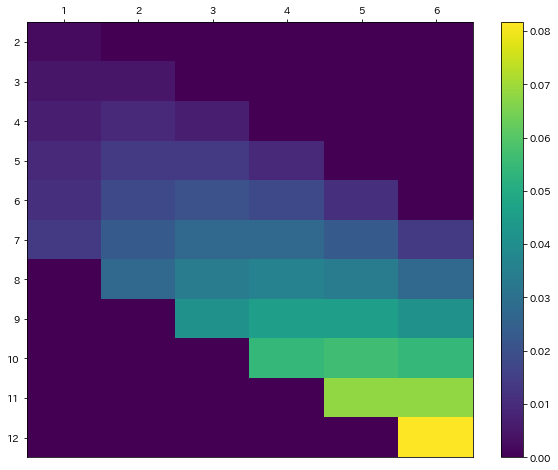

In [34]:
# 確率変数をヒートマップを使って図示する
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 23), minor=False)

# y軸を下が大きい数字になるように上下逆転させる
ax.invert_yaxis()
# x軸の目盛りをグラフ上側に表示
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [36]:
# 確率の性質が満たされているか確認
# ・確率が必ず0以上になっていること
# ・確率の総和が1になっていること
np.all(prob >= 0)

np.sum(prob)

1.0

In [ ]:
# 確率変数(X, Y)から確率変数Xの確率関数を求める
# →Xの確率関数f(x)は同時確率関数f(XY)にYが取りうる値すべてを
#     を代入し足し合わせると求められる
# この様にして求められたf(x)の事をXの周辺確率分布 or 周辺分布と呼ぶ